# Table of Contents

    2) Data Preparation
    3) Data Cleaning
    4) Exploratory Data Analysis
    5) Collaborative Filter
        5.1) SVD
        5.2) KNN 
    6) Evaluation
        6.1) Predictive Accuracy Metrics
        6.1) Classification Accuracy Metrics
        6.2) Rank Accuracy Metrics
    7) Interpretable Machine Learning
        7.1) LIME
        7.2) SHAP

# 1) Introduction

### Project Description
This project is done for the course system development for marketing of the Master Digital Driven Business. The goal of this project is to make a recommender system for Netflix and Jester.

### Business Questions
Main Business question:
- How can we use collaborative filtering to improve the success rate of a new movie streaming platform and increase the satisfaction of backers?

Sub-questions:
- Which collaborative algorithm should be implemented to effectivily recommend products to users based on their preferences?
- How can we personalize the crowdfunding experience for backers?
- How can the performance of the chosen collaborative algorithms be optimized?
- What measures can we take to ensure that the collaborative filtering recommender system is fair and transparent?
- Which metrics can we utilize to accurately measure the performance of the collaborative filtering recommender system?

For companies it is very important to know their customers and what to recommend to improve customer staisfaction and loyalty.
Therefore, a recommender system will be build using collaborative filter.

# 2) Dataset Preparation

In [2]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Surprise library
from surprise import Reader, Dataset, accuracy, SVD, NMF, KNNBasic, KNNWithMeans
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [3]:
# Importing Datasets
jester_df = pd.read_csv(r"jester_ratings.csv")
jester_text_df = pd.read_csv(r"jester_items.csv")

In [4]:
print('The dimensions of the jester dataframe are: ', jester_df.shape)
print('The dimensions of the jester text dataframe are: ', jester_text_df.shape)

The dimensions of the jester dataframe are:  (1761439, 3)
The dimensions of the jester text dataframe are:  (150, 2)


In [5]:
jester_df.head()

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [6]:
jester_text_df.head()

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


In [7]:
jester_df.describe()

,userId,jokeId,rating
count,1.761439e+06,1.761439e+06,1.761439e+06
mean,3.272322e+04,7.071133e+01,1.618602e+00
std,1.828011e+04,4.600790e+01,5.302608e+00
min,1.000000e+00,5.000000e+00,-1.000000e+01
25%,1.720200e+04,2.100000e+01,-2.031000e+00
50%,3.480800e+04,6.900000e+01,2.219000e+00
75%,4.730600e+04,1.120000e+02,5.719000e+00
max,6.397800e+04,1.500000e+02,1.000000e+01


In [8]:
jester_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761439 entries, 0 to 1761438
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   jokeId  int64  
 2   rating  float64
dtypes: float64(1), int64(2)
memory usage: 40.3 MB


In [9]:
print(jester_df.isnull().sum())
print(jester_text_df.isnull().sum())

#Percentage of data that is missing from the dataset
# print('\nPercentage of the data that has a null value:',(jester_df.isnull().sum()/jester_df.count())*100)

userId    0
jokeId    0
rating    0
dtype: int64
jokeId      0
jokeText    0
dtype: int64


# 3) Exploratory Data Analysis

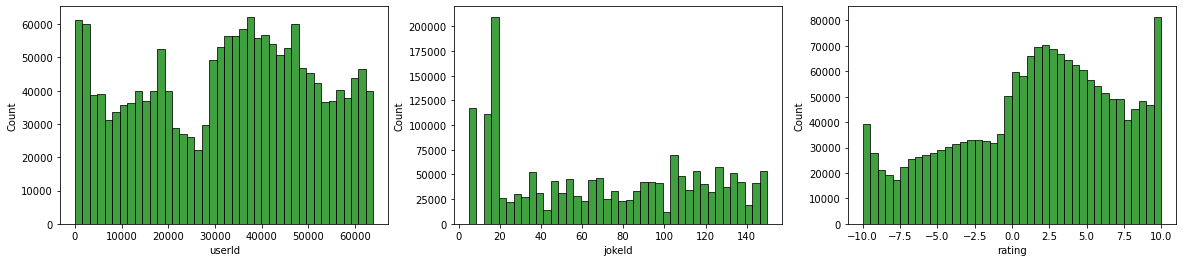

In [10]:
# Histogram plots of various variables
fig = plt.figure(figsize=(20, 4))

plt.subplot(1,3,1)
sns.histplot(data=jester_df, x="userId", element="bars", color=['green'], bins=40)

plt.subplot(1,3,2)
sns.histplot(data=jester_df, x="jokeId", element="bars", color=['green'], bins=40)

plt.subplot(1,3,3)
sns.histplot(data=jester_df, x="rating", element="bars", color=['green'], bins=40)

plt.show()

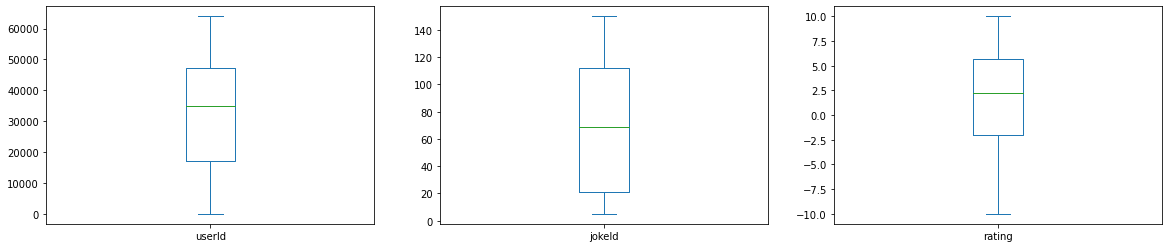

In [11]:
# Boxplots of various variables
jester_df.plot(kind = "box", subplots = True, figsize = (20,4), layout = (1,3))
plt.show()

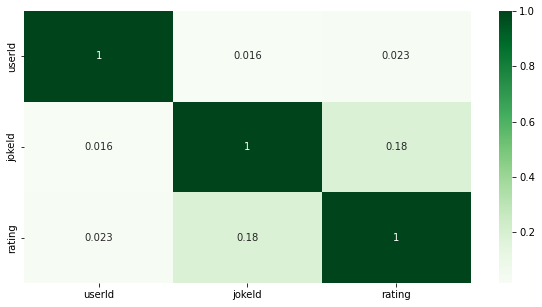

In [12]:
# Second Correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(jester_df.corr(),cbar=True,annot=True,cmap='Greens')
plt.show()

# 4) Collaborative Filter with Surprise

## 4.1) Code with Surprise and SVD (User based)

In [13]:
# Hyperparameter tuning with GridSearch
#parameters = {"n_factors": [100, 150, 200],
#              "reg_all": [0.04, 0.06],
#              "n_epochs": [5, 10, 15],
#              "lr_all": [.002, .005, .01]}
#gridsvd = GridSearchCV(SVD, param_grid=parameters, n_jobs=-1)
#gridsvd.fit(data)
#print(gridsvd.best_score)
#print(gridsvd.best_params)

In [14]:
svd = SVD(n_factors=100, reg_all=0.06, n_epochs=5, lr_all=.005)

In [15]:
# Loading the Data
reader = Reader(rating_scale=(-10, 10))
svd_data = Dataset.load_from_df(jester_df[['userId', 'jokeId', 'rating']], reader)

In [16]:
svd_trainset, svd_testset = train_test_split(svd_data, test_size=0.2)

In [17]:
# Fitting KNNBasic model to training set
svd.fit(svd_trainset)

# Test the model on the testing set
svd_predictions = svd.test(svd_testset)

In [18]:
# Printing users actual ratings and the predicted ratings
for prediction in svd_predictions[0:5]:
    print(prediction)

user: 37611      item: 96         r_ui = 2.03   est = 0.96   {'was_impossible': False}
user: 10870      item: 15         r_ui = 4.31   est = 0.36   {'was_impossible': False}
user: 44683      item: 135        r_ui = 4.62   est = 3.42   {'was_impossible': False}
user: 3423       item: 13         r_ui = -4.00   est = -1.48   {'was_impossible': False}
user: 41441      item: 18         r_ui = 1.12   est = -4.51   {'was_impossible': False}


In [19]:
# Print the performance metrics
accuracy.rmse(svd_predictions)

RMSE: 4.2714


4.271395915633741

In [20]:
# Inspiration from https://www.kaggle.com/code/laowingkin/netflix-movie-recommendation (need APA style)
# Function to recommend an user a number of recommendations
def recommend_SVD(userId, num_recommendations):
    user_df = jester_text_df.copy()
    user_df = user_df.reset_index()

    data = Dataset.load_from_df(jester_df[['userId', 'jokeId', 'rating']], reader)

    trainset = data.build_full_trainset()
    svd.fit(trainset)

    user_df['Estimate_Score'] = user_df['jokeId'].apply(lambda x: svd.predict(userId, x).est)

    user_df = user_df.drop('jokeId', axis = 1)

    user_df = user_df.sort_values('Estimate_Score', ascending=False)
    print(user_df.head(num_recommendations))

In [21]:
# Recommend user 100 with the top 10 jokes
recommend_SVD(100, 10)

     index                                           jokeText  Estimate_Score
12      12  They asked the Japanese visitor if they have e...        5.841119
126    126  A little boy goes to his dad and asks, "What i...        5.752292
16      16  How many men does it take to screw in a light ...        4.890832
35      35  A guy walks into a bar, orders a beer and says...        4.493776
28      28  An old Scotsmen is sitting with a younger Scot...        4.493078
107    107  A man approached a very beautiful woman in a l...        4.403557
128    128  A group of girlfriends is on vacation when the...        4.355050
49      49  A guy goes into confession and says to the pri...        4.166137
55      55  A man and Cindy Crawford get stranded on a des...        4.053625
52      52  One Sunday morning William burst into the livi...        4.036792


In [22]:
# Function where the user can input their user id and the number of recommendation they need
def recommend_SVD_input():
    userId = int(input("What is your User ID?"))
    num_recommendations = int(input("How many recommendations do you want?"))
    user_df = jester_text_df.copy()
    user_df = user_df.reset_index()

    data = Dataset.load_from_df(jester_df[['userId', 'jokeId', 'rating']], reader)

    trainset = data.build_full_trainset()
    svd.fit(trainset)

    user_df['Estimate_Score'] = user_df['jokeId'].apply(lambda x: svd.predict(userId, x).est)

    user_df = user_df.drop('jokeId', axis = 1)

    user_df = user_df.sort_values('Estimate_Score', ascending=False)
    print(user_df.head(num_recommendations))

In [23]:
# Function where the user gets a random joke and depending if they like or dislike the joke, they get another similar joke
import random

def recommend_SVD_input_2():
    user_df = jester_text_df.copy()
    user_df = user_df.reset_index()

    data = Dataset.load_from_df(jester_df[['userId', 'jokeId', 'rating']], reader)

    trainset = data.build_full_trainset()
    svd.fit(trainset)

    # Randomly select a joke
    random_jokeId = random.randint(1, 128)
    random_joke_text = user_df.loc[user_df['jokeId'] == random_jokeId, 'jokeText'].item()
    print("Here is your joke: ")
    print(random_joke_text)

    accum = 0
   
    while True:
        liked = input("Do you want a similair joke? Answer with Y or N")
        # Ask the user to continue or leave
        if liked.lower() == 'y':
            user_df['Estimate_Score'] = user_df['jokeId'].apply(lambda x: svd.predict(random_jokeId, x).est)
            user_df = user_df.sort_values('Estimate_Score', ascending=False)
            print("Here is another joke: ")
            print(user_df['jokeText'][accum])
            accum += 1
        else:
            print("Goodbye")
            break

## 4.2) Code with Surprise and KNN

In [24]:
# Hyperparameter tuning with GridSearch
#parameters = {"name": ["cosine", "pearson"],
#              "user_based": [True, False],
#              "min_support": [True, False],
#              "min_k": [2, 5, 10]}
#gridknn = GridSearchCV(KNNBasic, param_grid=parameters, n_jobs=-1)
#gridknn.fit(data)
#print(gridknn.best_score)
#print(gridknn.best_params)

In [25]:
# Loading the dataset
reader = Reader(rating_scale=(-10, 10))
knn_data = Dataset.load_from_df(jester_df[['userId', 'jokeId', 'rating']][:200000], reader) # using only 200k rows for faster run time

In [26]:
# Fitting a KNNBasic model to the training set
knn = KNNBasic(sim_options={"name": 'pearson',
                            "user_based": True,
                            "min_support": True,
                            "min_k": 1})

In [27]:
knn_trainset, knn_testset = train_test_split(knn_data, test_size=0.2)

In [28]:
# Fitting KNNBasic model to training set
knn.fit(knn_trainset)

# Test the model on the testing set
knn_predictions = knn.test(knn_testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [29]:
# Printing users actual ratings and the predicted ratings
for prediction in knn_predictions[0:5]:
    print(prediction)

user: 6307       item: 46         r_ui = -8.22   est = -2.57   {'actual_k': 40, 'was_impossible': False}
user: 1389       item: 47         r_ui = -9.91   est = 2.16   {'actual_k': 40, 'was_impossible': False}
user: 3779       item: 15         r_ui = -7.38   est = -2.75   {'actual_k': 40, 'was_impossible': False}
user: 5879       item: 32         r_ui = 1.56   est = 1.77   {'actual_k': 40, 'was_impossible': False}
user: 5073       item: 7          r_ui = -9.84   est = -2.44   {'actual_k': 40, 'was_impossible': False}


In [30]:
# Print the performance metrics
accuracy.rmse(knn_predictions)

RMSE: 5.3573


5.357290235879258

In [31]:
def recommend_KNN(userId, num_recommendations):
    user_df = jester_text_df.copy()
    user_df = user_df.reset_index()

    data = Dataset.load_from_df(jester_df[['userId', 'jokeId', 'rating']][:200000], reader)

    trainset = data.build_full_trainset()
    knn.fit(trainset)

    user_df['Estimate_Score'] = user_df['jokeId'].apply(lambda x: knn.predict(userId, x).est)

    user_df = user_df.drop('jokeId', axis = 1)

    user_df = user_df.sort_values('Estimate_Score', ascending=False)
    print(user_df.head(num_recommendations))

In [32]:
# Recommend user 100 with the top 10 jokes
recommend_KNN(100, 10)

Computing the pearson similarity matrix...
Done computing similarity matrix.
     index                                           jokeText  Estimate_Score
16      16  How many men does it take to screw in a light ...        5.168930
12      12  They asked the Japanese visitor if they have e...        4.744469
26      26  Clinton returns from a vacation in Arkansas an...        4.057151
131    131  Mickey Mouse is having a nasty divorce with Mi...        4.043273
34      34  An explorer in the deepest Amazon suddenly fin...        4.001111
31      31  A man arrives at the gates of heaven. St. Pete...        3.977635
88      88  A radio conversation of a US naval \nship with...        3.917150
125    125  A Briton, a Frenchman and a Russian are viewin...        3.805353
47      47  The graduate with a Science degree asks, "Why ...        3.764531
104    104  A couple of hunters are out in the woods in th...        3.702548


In [33]:
# Function where the user can input their user id and the number of recommendation they need
def recommend_KNN_input():
    userId = int(input("What is your User ID?"))
    num_recommendations = int(input("How many recommendations do you want?"))
    user_df = jester_text_df.copy()
    user_df = user_df.reset_index()

    data = Dataset.load_from_df(jester_df[['userId', 'jokeId', 'rating']][:200000], reader)

    trainset = data.build_full_trainset()
    knn.fit(trainset)

    user_df['Estimate_Score'] = user_df['jokeId'].apply(lambda x: knn.predict(userId, x).est)

    user_df = user_df.drop('jokeId', axis = 1)

    user_df = user_df.sort_values('Estimate_Score', ascending=False)
    print(user_df.head(num_recommendations))

In [34]:
# Function where the user gets a random joke and depending if they like or dislike the joke, they get another similar joke
import random

def recommend_KNN_input_2():
    user_df = jester_text_df.copy()
    user_df = user_df.reset_index()

    data = Dataset.load_from_df(jester_df[['userId', 'jokeId', 'rating']][:200000], reader)

    trainset = data.build_full_trainset()
    knn.fit(trainset)

    # Randomly select a joke
    random_jokeId = random.randint(1, 128)
    random_joke_text = user_df.loc[user_df['jokeId'] == random_jokeId, 'jokeText'].item()
    print("Here is your joke: ")
    print(random_joke_text)

    accum = 0
   
    while True:
        liked = input("Do you want a similair joke? Answer with Y or N")
        # Ask the user to continue or leave
        if liked.lower() == 'y':
            user_df['Estimate_Score'] = user_df['jokeId'].apply(lambda x: knn.predict(random_jokeId, x).est)
            user_df = user_df.sort_values('Estimate_Score', ascending=False)
            print("Here is another joke: ")
            print(user_df['jokeText'][accum])
            accum += 1
        else:
            print("Goodbye")
            break

# 5) Predictive accuracy metrics

In [35]:
# Run 5-fold cross-validation and print results
cross_validate(knn, knn_data, measures=["RMSE", "MAE"], cv=5, verbose=True) # Loading time ~10 minutes

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    5.3369  5.3319  5.3611  5.3508  5.3601  5.3482  0.0119  
MAE (testset)     4.3679  4.3737  4.4026  4.3851  4.4039  4.3867  0.0146  
Fit time          29.02   29.09   27.94   28.23   28.65   28.58   0.45    
Test time         36.46   34.18   34.55   35.97   35.08   35.25   0.86    


{'test_rmse': array([5.33691877, 5.33189977, 5.3610713 , 5.35081245, 5.36013321]),
 'test_mae': array([4.36794724, 4.37370591, 4.40261346, 4.38514116, 4.40389767]),
 'fit_time': (29.016343116760254,
  29.090988874435425,
  27.938860654830933,
  28.229264974594116,
  28.648693323135376),
 'test_time': (36.46067547798157,
  34.17726707458496,
  34.55016565322876,
  35.972158670425415,
  35.08060383796692)}

In [36]:
# Run 5-fold cross-validation and print results
cross_validate(svd, svd_data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.2696  4.2820  4.2678  4.2848  4.2992  4.2807  0.0114  
MAE (testset)     3.1401  3.1470  3.1337  3.1495  3.1555  3.1452  0.0076  
Fit time          3.41    3.53    3.54    3.67    3.60    3.55    0.09    
Test time         2.58    2.50    2.09    2.12    2.18    2.29    0.20    


{'test_rmse': array([4.26957043, 4.28202833, 4.26782239, 4.28476312, 4.2991985 ]),
 'test_mae': array([3.1401429 , 3.14695411, 3.13371046, 3.14946202, 3.15553092]),
 'fit_time': (3.4069724082946777,
  3.526571035385132,
  3.5365469455718994,
  3.6681923866271973,
  3.598378896713257),
 'test_time': (2.581317186355591,
  2.495300054550171,
  2.090380907058716,
  2.1173386573791504,
  2.1843576431274414)}